<h1 style="color:cornflowerblue">Objectives</h1>
<p>The current project aims to predict the expenses with Health insurance, according to the person buying it.</p>

<h1 style="color:cornflowerblue">Importing Libraries</h1>

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

<h1 style="color:cornflowerblue">Configuring Pandas</h1>

In [2]:
# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None) 

# NOT show numbers as scientific notation
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Setting Plot Styles
sns.set_style("darkgrid")

# Color Palette for Seaborn
sns.set_palette("dark")

<h1 style="color:cornflowerblue">Dataframe</h1>

<h2 style="color:cornflowerblue">Importing Dataframe</h2>

In [3]:
df_insurance = pd.read_csv("./data/insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


<h2 style="color:cornflowerblue">Dataframe Basic Statistics</h2>

In [4]:
# Shape of the Dataframe
df_insurance.shape

(1338, 7)

In [5]:
# Data Types
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# General Information
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Descritive Statistics
df_insurance.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [8]:
sns.color_palette

<function seaborn.palettes.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)>

<h2 style="color:cornflowerblue">Analysis of Distributions</h2>

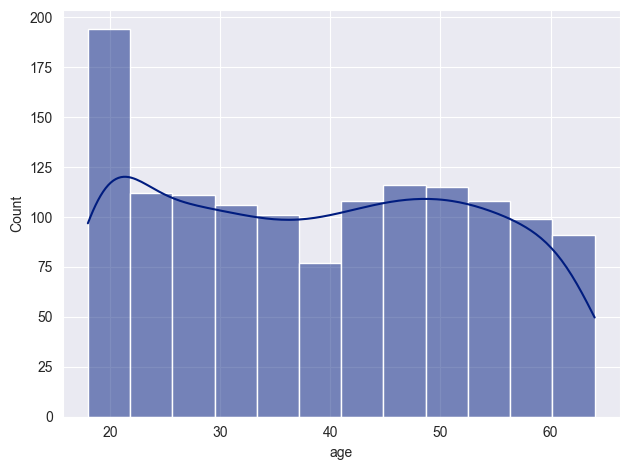

In [9]:
# Age distribution
sns.histplot(data=df_insurance, x='age', bins=12, stat="count", kde=True)
plt.tight_layout()

<Axes: xlabel='bmi', ylabel='Count'>

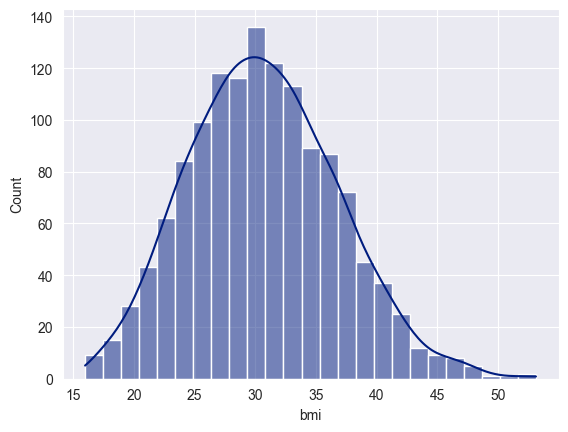

In [10]:
# Analysis of the BMI distribution
plt.tight_layout()
sns.histplot(data=df_insurance, x='bmi', stat="count", kde=True, color=sns.color_palette()[0])


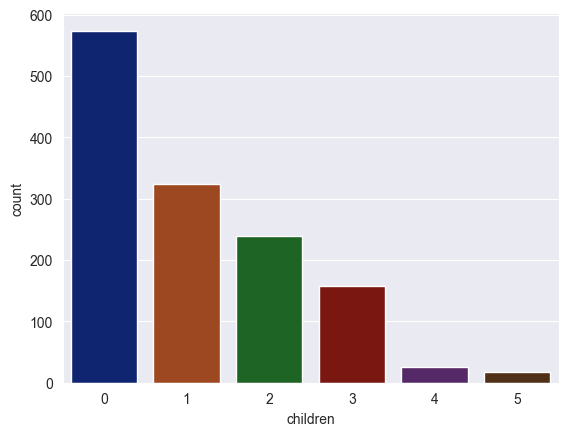

In [11]:
# Analysis of the Children distribution
plt.tight_layout()
sns.countplot(data=df_insurance, x='children', stat="count", hue="children", legend=None, palette=sns.color_palette()[:6])
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_21028\1487546426.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_insurance, x='charges', stat="count", kde=True, palette=sns.color_palette()[0])


<Axes: xlabel='charges', ylabel='Count'>

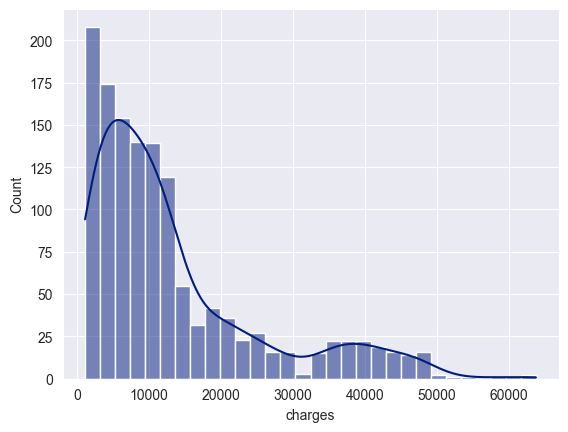

In [12]:
# Analysis of the target variable: Charges
sns.set_style("darkgrid")
plt.tight_layout()
sns.histplot(data=df_insurance, x='charges', stat="count", kde=True, palette=sns.color_palette()[0])

<h2 style="color:cornflowerblue">Relation Between Features and Target Variable</h2>

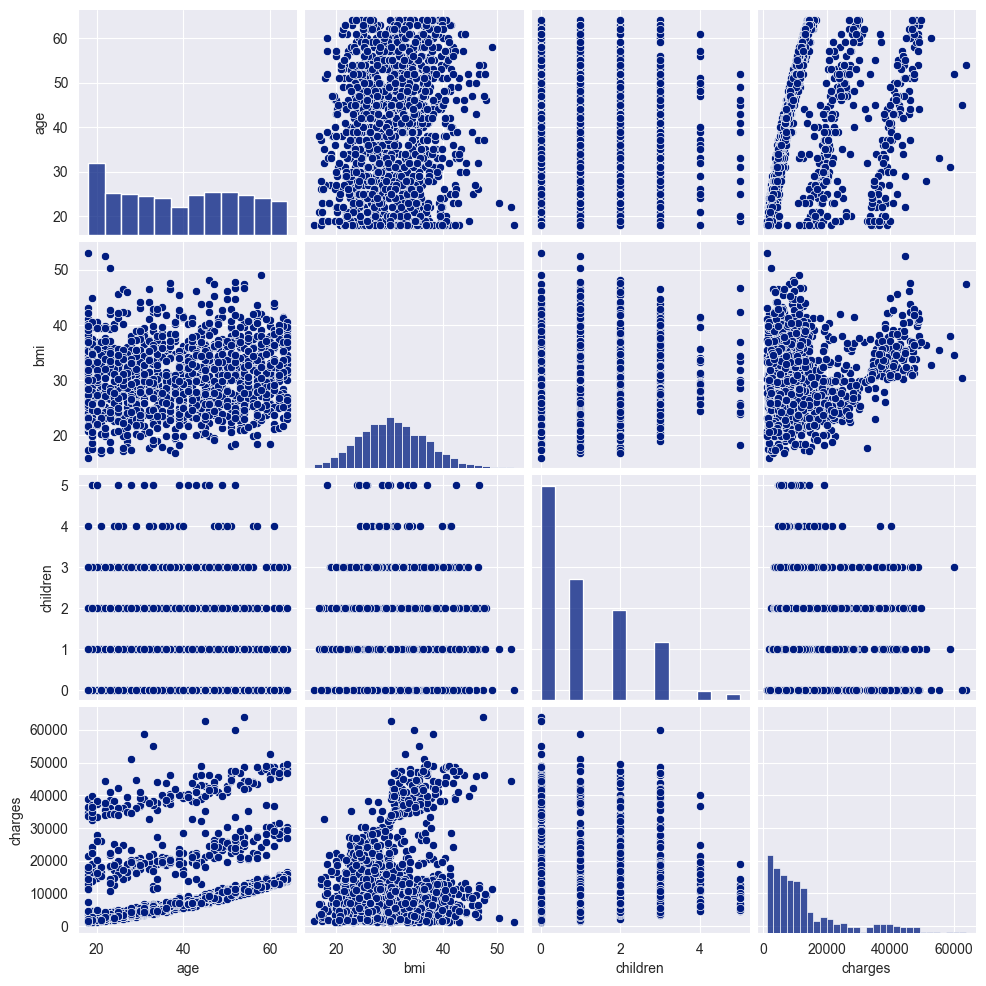

In [13]:
sns.pairplot(data=df_insurance)

<h3 style="color:cornflowerblue">Insights on Target Variable</h3>
<p>Considering the "charges" row (target variable), it is possible to see 3 different groups of customers in the charges x age graphic. Also, we can see a relation between the increase of age and the charge in the same graphic, making this a important variable in the preditive model.

<h2 style="color:cornflowerblue">Categorical Variables</h2>

In [14]:
# List of categorical variables
categ_cols = [categ for categ in df_insurance.dtypes.index if df_insurance.dtypes[categ] == 'object'] 
categ_cols

['sex', 'smoker', 'region']

In [15]:
# Sex values and its counts - Using map since there are only 2 answers
df_insurance['sex'].value_counts(dropna=False)

sex
male      676
female    662
Name: count, dtype: int64

In [16]:
# Dictionary of sex values
df_insurance_sex_dict = {sex:df_insurance['sex'].unique().tolist().index(sex) for sex in df_insurance['sex'].unique().tolist()}
df_insurance_sex_dict

{'female': 0, 'male': 1}

In [17]:
# Transforming the categorical values into numeric for the sex column
df_insurance['male'] = df_insurance['sex'].map(df_insurance_sex_dict)
df_insurance = df_insurance.drop(['sex'], axis='columns')
df_insurance['male'].value_counts(dropna=False)

male
1    676
0    662
Name: count, dtype: int64

In [18]:
# Smoker values and its counts - Using map since there are only 2 answers
df_insurance['smoker'].value_counts(dropna=False)

smoker
no     1064
yes     274
Name: count, dtype: int64

In [19]:
# Dictionary of smoker values
df_insurance_smoker_dict = {smoker:sorted(df_insurance['smoker'].unique().tolist()).index(smoker) for smoker in df_insurance['smoker'].unique().tolist()}
df_insurance_smoker_dict

{'yes': 1, 'no': 0}

In [20]:
df_insurance['smoker'] = df_insurance['smoker'].map(df_insurance_smoker_dict)
df_insurance['smoker'].value_counts(dropna=False)

smoker
0    1064
1     274
Name: count, dtype: int64

In [21]:
# Region values and its counts - Using pandas Get Dummies since there are several answers
df_insurance["region"].value_counts(dropna=False)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [22]:
# Creating a dataframe of the regions
region_columns = pd.get_dummies(df_insurance['region'],drop_first=True)
region_columns.head()

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [23]:
# Adding the regions dataframe to the original dataframe and removing the previous column
df_insurance = pd.concat([df_insurance,region_columns], axis=1)
df_insurance = df_insurance.drop(['region'], axis = 1)
df_insurance.head(10)

,age,bmi,children,smoker,charges,male,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,0,False,False,True
1,18,33.77,1,0,1725.55,1,False,True,False
2,28,33.00,3,0,4449.46,1,False,True,False
3,33,22.70,0,0,21984.47,1,True,False,False
4,32,28.88,0,0,3866.86,1,True,False,False
5,31,25.74,0,0,3756.62,0,False,True,False
6,46,33.44,1,0,8240.59,0,False,True,False
7,37,27.74,3,0,7281.51,0,True,False,False
8,37,29.83,2,0,6406.41,1,False,False,False
9,60,25.84,0,0,28923.14,0,True,False,False


<h2 style="color:cornflowerblue">Defining Variables</h2>

In [24]:
# Target Variable
y = df_insurance[['charges']]
y.head()


,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [25]:
# Predictive Variables
x = df_insurance.drop('charges', axis='columns')
x.head()

,age,bmi,children,smoker,male,northwest,southeast,southwest
0,19,27.90,0,1,0,False,False,True
1,18,33.77,1,0,1,False,True,False
2,28,33.00,3,0,1,False,True,False
3,33,22.70,0,0,1,True,False,False
4,32,28.88,0,0,1,True,False,False


<h1 style="color:cornflowerblue">Separating Bases</h1>
<p>To avoid data leakage, first comes the separation of train and test bases, and after that the scaling, missing data treatment, ...</p>

In [26]:
# Separating Train and Test Bases
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

<h1 style="color:cornflowerblue">Normalizing</h1>
<p>Using MinMaxScaler the linear variables</p>

In [27]:
df_insurance.describe()

,age,bmi,children,smoker,charges,male
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.51
std,14.05,6.10,1.21,0.40,12110.01,0.50
min,18.00,15.96,0.00,0.00,1121.87,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00
50%,39.00,30.40,1.00,0.00,9382.03,1.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00
max,64.00,53.13,5.00,1.00,63770.43,1.00


In [28]:
# Creating Scaler
scaler = MinMaxScaler()

In [29]:
columns = x_train.columns

# IMPORTANT
# Fit in the train base!
# Transform in train and test

x_train[columns] = scaler.fit_transform(x_train)
x_test[columns] = scaler.transform(x_test)

x_train.shape, x_test.shape

((1070, 8), (268, 8))

In [30]:
x_train.head()

,age,bmi,children,smoker,male,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,0.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,0.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,0.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,0.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,0.00,1.00,0.00,0.00


In [31]:
x_train.describe()

,age,bmi,children,smoker,male,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.51,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [32]:
x_test.head()

,age,bmi,children,smoker,male,northwest,southeast,southwest
764,0.59,0.25,0.40,0.00,0.00,0.00,0.00,0.00
887,0.39,0.38,0.00,0.00,0.00,1.00,0.00,0.00
890,1.00,0.29,0.00,1.00,0.00,1.00,0.00,0.00
1293,0.61,0.26,0.60,0.00,1.00,1.00,0.00,0.00
259,0.02,0.43,0.00,1.00,1.00,1.00,0.00,0.00


In [33]:
x_test.describe()

,age,bmi,children,smoker,male,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.48,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


<h1 style="color:cornflowerblue">Analysing the Correlation Between Variables</h1>
<p>When using linear models, it is important to know if the predictive variables have any kind of linearity. If two variables have a linear correlation, one of them must bem dropped so the model wont be affected by it.

<Axes: >

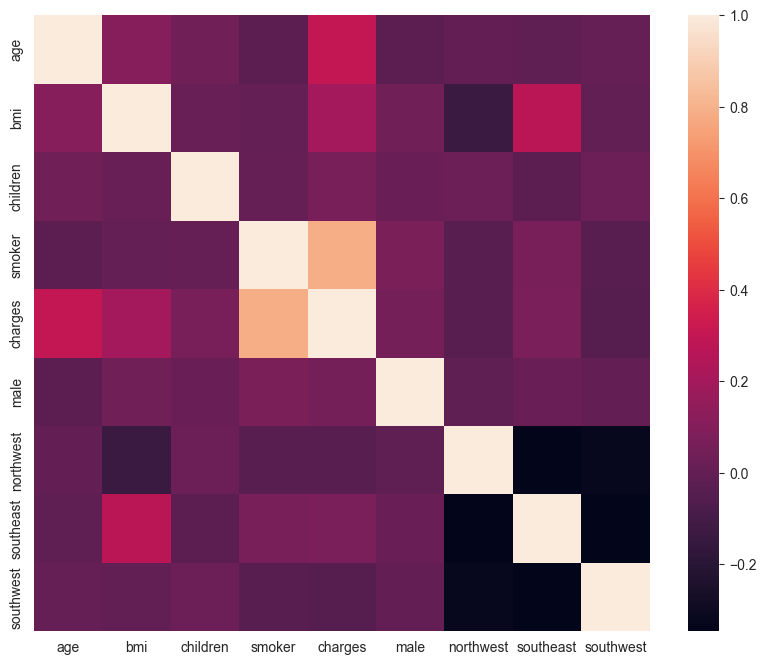

In [34]:
figure, graph = plt.subplots(figsize=(10, 8))
corr = df_insurance.corr()
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=bool), 
            square=True, 
            ax=graph)

<h1 style="color:cornflowerblue">Checking for Missing Data</h1>

In [35]:
# Checking for null data
df_insurance.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
male         0
northwest    0
southeast    0
southwest    0
dtype: int64

<h1 style="color:cornflowerblue">Creating a Model</h1>
<p>

<h2 style="color:cornflowerblue">Linear Regression</h2>

In [36]:
# Creating estimator
lin_reg = LinearRegression()

#training and using cross validation
rmse_val_lin_reg = cross_val_score(estimator=lin_reg, 
                                   X=x_train, 
                                   y=y_train, 
                                   cv=10, 
                                   scoring='neg_root_mean_squared_error')
rmse_val_lin_reg

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [37]:
rmse_mean_real_lin_reg = rmse_val_lin_reg.mean()
rmse_mean_real_lin_reg

np.float64(-6133.0839262055)

<h2 style="color:cornflowerblue">Regression Tree</h2>

In [38]:
# Creating Estimator
dec_tree = DecisionTreeRegressor()

# Train using Cross Validation
rmse_val_dec_tree = cross_val_score(estimator=dec_tree, 
                                    X=x_train, 
                                    y=y_train, 
                                    cv=10,
                                    scoring='neg_root_mean_squared_error')
rmse_val_dec_tree

array([-6869.41375773, -7503.94058993, -7029.43786502, -6737.13083452,
       -7476.14062567, -6512.21022772, -7460.19773394, -7294.4777276 ,
       -6640.73203014, -5992.53272943])

In [39]:
rmse_mean_real_dec_tree = rmse_val_dec_tree.mean()
rmse_mean_real_dec_tree

np.float64(-6951.621412169935)

<h1 style="color:cornflowerblue">Hypothesis Test - Removing Regions</h1>
<p>The regions seem to have little impact and correlation. Let's try to remove them</p>

In [40]:
region_columns.columns.tolist()

['northwest', 'southeast', 'southwest']

In [41]:
# Linear Regression
rmse_val_lin_reg_noregion = cross_val_score(estimator=lin_reg, 
                                   X=x_train.drop(region_columns.columns.tolist(), axis=1), 
                                   y=y_train, 
                                   cv=10, 
                                   scoring='neg_root_mean_squared_error')
rmse_val_lin_reg_noregion

array([-6047.74861144, -6576.17442833, -5208.18399508, -5969.09583538,
       -5870.19697933, -6107.50898187, -7295.03885205, -6309.72867769,
       -6178.86188095, -5652.91238386])

In [42]:
rmse_mean_real_lin_reg_noregion = rmse_val_lin_reg_noregion.mean()
rmse_mean_real_lin_reg_noregion

np.float64(-6121.545062597131)

In [43]:
# Decision Tree
rmse_val_dec_tree_noregion = cross_val_score(estimator=dec_tree, 
                                    X=x_train.drop(region_columns.columns.tolist(), axis=1), 
                                    y=y_train, 
                                    cv=10,
                                    scoring='neg_root_mean_squared_error')
rmse_val_dec_tree_noregion

array([-6608.12086045, -6690.70227809, -6119.80069123, -6938.45981444,
       -7050.11320864, -6787.76825861, -7876.7993737 , -7357.34293629,
       -6804.06225777, -6810.96411298])

In [44]:
rmse_mean_real_dec_tree_noregion = rmse_val_dec_tree_noregion.mean()
rmse_mean_real_dec_tree_noregion

np.float64(-6904.413379219996)

Text(0.5, 1.0, 'RMSE Comparison')

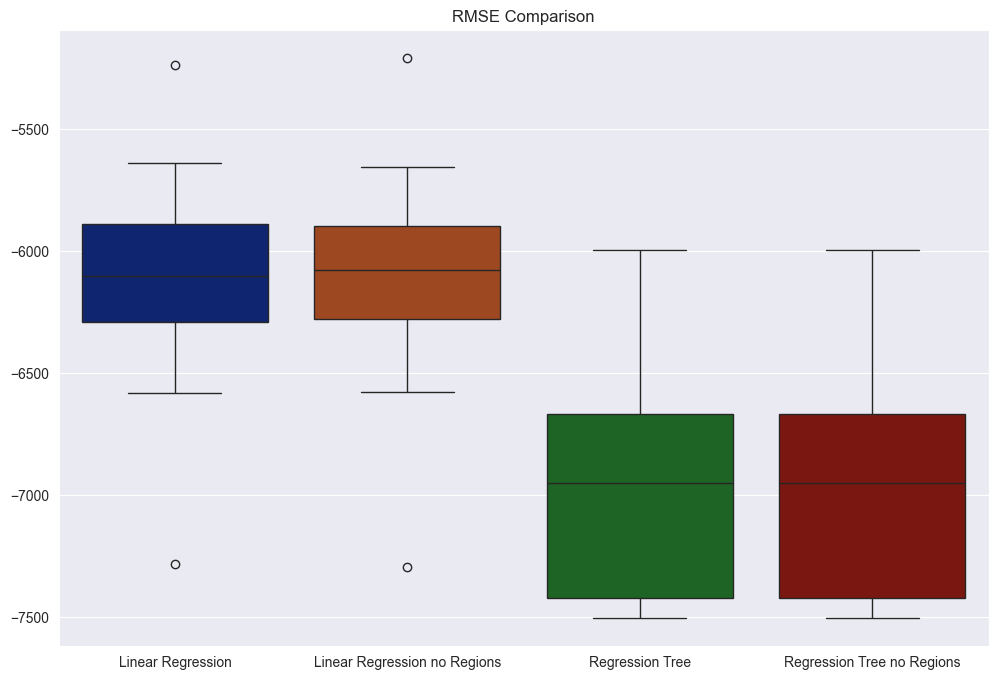

In [45]:
# Boxplot of the resulting models

rmse = pd.DataFrame({'Linear Regression': rmse_val_lin_reg, 
                     'Linear Regression no Regions': rmse_val_lin_reg_noregion, 
                     'Regression Tree': rmse_val_dec_tree,
                     'Regression Tree no Regions': rmse_val_dec_tree})

figure, graph = plt.subplots(figsize=(12, 8))
sns.boxplot(data=rmse, ax= graph).set_title("RMSE Comparison")

<h1 style="color:cornflowerblue">Selecting the Best Model</h1>
<p>Using the selected model to fit in the training base</p>

In [46]:
# Fitting the best model
lin_reg.fit(x_train.drop(region_columns.columns.tolist(), axis=1), y_train)

LinearRegression()

In [47]:
# Showing coeficients
lin_reg.coef_

array([[ 1.18251723e+04,  1.21744207e+04,  2.13627215e+03,
         2.36539033e+04, -7.95178837e+00]])

In [48]:
# Creating a Dataframe with the coeficients
df_coef = pd.DataFrame(lin_reg.coef_)
df_coef.columns = lin_reg.feature_names_in_
df_coef

,age,bmi,children,smoker,male
0,11825.17,12174.42,2136.27,23653.90,-7.95


<h1 style="color:cornflowerblue">Statistical Validation</h1>
<p>Calculating p-value of the coefficients of each regression. Values higher than 0.05 make the coefficients not statistically valid.</p>

In [49]:
# Statistical validation of values
rl_statsmodels = sm.OLS(y_train, x_train.drop(region_columns.columns.tolist(), axis=1))
fit_result = rl_statsmodels.fit()
p_value = fit_result.summary2().tables[1]['P>|t|']
p_value

age        0.00
bmi        0.00
children   0.06
smoker     0.00
male       0.24
Name: P>|t|, dtype: float64

<h1 style="color:cornflowerblue">Final Model</h1>
<p>After comparing and choosing the best model, now it can be used in the test bases.</p> 
<p>To get to this point we must first make sure to train as much models as needed, and make sure to use with Cross Validation in the train bases.</p>

In [50]:
# Check the estimator (fitted) and predicted values
predicted_prices = lin_reg.predict(x_test.drop(region_columns.columns.tolist(), axis = 1))
predicted_prices[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [51]:
# real values of the test base
y_test.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [52]:
# Creating dataframe of real and predicted values
df_real_pred = pd.DataFrame({'predicted': predicted_prices.flatten(), 'real': y_test.values.flatten()})
df_real_pred['diferenca_abs'] = abs(df_real_pred['predicted'] - df_real_pred['real'])
df_real_pred.head(20)

,predicted,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [53]:
# Checking the r2 score of the model
r2_score(y_true = y_test, y_pred=predicted_prices)

# Not a bad result, it is a decent result to explains the target variable

0.7811302113434095

<h1 style="color:cornflowerblue">Input Information</h1>
<p>Creating an input of information for the model to predict the charges</p>

In [54]:
in_age = input()
in_age

'18'

In [55]:
in_ibm = input()
in_ibm

'35'

In [56]:
in_children = input()
in_children

'0'

In [57]:
in_smoker = input("1 for smker; 0 for not skmoker: ")
in_smoker

'0'

In [58]:
in_sex = input("1 for woman; 0 for man: ")
in_sex

'0'

In [59]:
# The original x_train had region columns, so it must be compleated
features = pd.DataFrame(data=[[in_age, in_ibm, in_children, in_smoker, in_sex, 1, 1, 1]], columns=columns)

# Scaler from the train base (DO NOT FIT IT AGAIN)
features = pd.DataFrame(data=scaler.transform(features), columns=columns)
features

,age,bmi,children,smoker,male,northwest,southeast,southwest
0,0.00,0.51,0.00,0.00,0.00,1.00,1.00,1.00


In [60]:
# Removing the unused features
features = features.drop(columns=columns[-3:])
features


,age,bmi,children,smoker,male
0,0.00,0.51,0.00,0.00,0.00


In [61]:
# Prediction results
lin_reg.predict(features)

array([[3977.46304385]])